<a href="https://colab.research.google.com/github/kamakshisoni/Internship-task/blob/main/taskdatanew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please find some metadata around each columns.
- max_return_days: Maximum number of days in which user made a re-purchase

- average_return_days: Average number of days in which user made a purchase

- customer_since_months : No of months since user started paying

- total_revenue: Total revenue made from this user

- average_revenue: Average revenue made from this user

- avg_vas_count: Average amount of vas counts

- avg_used_vas_value: Average number of vas used by the user

- business_type: Business type

- avg_wallet_bonus: Average bonus amount in wallet

- avg_active_ads: Average no of active ads

- avg_new_ads: Average no of new ads

- avg_email_replies: Average no of email replies

- avg_call_replies: Average no of call replies

- avg_sms_replies: Average no of sms replies

- target: If user stays or leaves



#### Basic Insights from the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/geniusai-research/interns_task/main/taskdata.csv")

In [ ]:
df.head(10)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.00,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.00,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.00,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.00,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.50,48.230769,1.692308,17.461538,25.769231,0.230769,0
5,412391,113.0,1,1.000000,14,0.0,0.0,12.692308,380.769231,0,350.00,799.153846,115.153846,166.307692,160.769231,0.153846,0
6,412662,1005.0,21,4.636364,11,0.0,0.0,1.000000,26.363636,0,0.00,119.727273,12.454545,46.000000,57.272727,0.181818,0
7,457000,262.0,29,3.250000,16,0.0,0.0,3.250000,68.750000,3,63.07,26.937500,3.250000,18.625000,17.062500,0.062500,0
8,490356,1005.0,3,1.400000,5,0.0,0.0,0.000000,0.000000,5,0.00,2.500000,0.500000,1.000000,1.750000,0.000000,1
9,491551,1017.0,1,1.000000,2,0.0,0.0,0.000000,0.000000,0,0.00,74.500000,10.500000,4.500000,9.500000,0.000000,1


In [ ]:
df.shape

(4407, 17)

In [ ]:
df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [ ]:
df2 = df.dropna(subset=['account_id'],axis=0)

In [ ]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df2.drop("target",axis=1)
y = df2['target']

In [ ]:
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=13,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0)

In [ ]:
sfs.fit(X,y)
sfs.k_feature_names_     # to get the final set of features

('user_id',
 'account_id',
 'max_return_days',
 'average_return_days',
 'customer_since_months',
 'total_revenue',
 'average_revenue',
 'avg_vas_count',
 'avg_used_vas_value',
 'business_type',
 'avg_wallet_bonus',
 'avg_active_ads',
 'avg_new_ads')

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=6,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

features = feature_selector.fit(np.array(X),y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   43.9s finished

[2020-10-27 17:06:39] Features: 15/6 -- score: 0.8337301173650459[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   40.2s finished

[2020-10-27 17:07:19] Features: 14/6 -- score: 0.8405858885120518[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   36.8s finished

[2020-10-27 17:07:56] Features: 13/6 -- score: 0.8399457478260275[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
X.columns[list(features.k_feature_idx_)]

Index(['account_id', 'max_return_days', 'customer_since_months',
       'avg_vas_count', 'business_type', 'avg_wallet_bonus'],
      dtype='object')

In [ ]:
features.k_feature_idx_

(1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15)

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456465 sha256=a36cd482780ba82e35e569f5b1ac653eafa71f5235c89548adf30e89ab6d0b56
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [ ]:

import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from lightgbm import LGBMClassifier
plt.rcParams['figure.figsize'] = [5, 5]
pd.set_option('display.max_columns', None)
# model explainability use case
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix,plot_roc_curve
import shap

In [ ]:
# getting the counts of each customer
for cols in df2.columns:
    print('------------------------------------')
    print(df2[cols].value_counts())
print('we have {} rows in our dataset'.format(df2.shape[0]))
print('we have {} columns in our dataset'.format(df2.shape[1]))

------------------------------------
644020221     1
652458654     1
7146464961    1
6285118100    1
735083158     1
             ..
649418040     1
7338249527    1
7342781748    1
4738355       1
7345477042    1
Name: user_id, Length: 4400, dtype: int64
------------------------------------
1005.0    684
493.0     483
499.0     467
496.0     467
262.0     438
1017.0    436
113.0     290
226.0     275
111.0     248
112.0     148
364.0     134
517.0     112
202.0     111
115.0      73
116.0      34
Name: account_id, dtype: int64
------------------------------------
1      2088
31      250
2       202
3       167
4       110
       ... 
110       1
154       1
158       1
174       1
273       1
Name: max_return_days, Length: 229, dtype: int64
------------------------------------
1.000000     2087
31.000000      58
1.076923       43
7.000000       40
2.000000       37
             ... 
10.090909       1
5.153846        1
3.444444        1
3.900000        1
91.333333       1
Name: average_

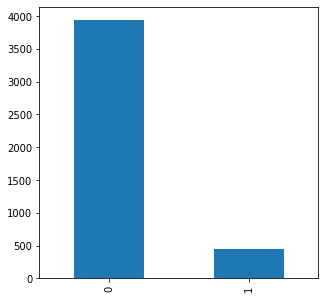

In [ ]:
df2.target.value_counts().plot(kind='bar')

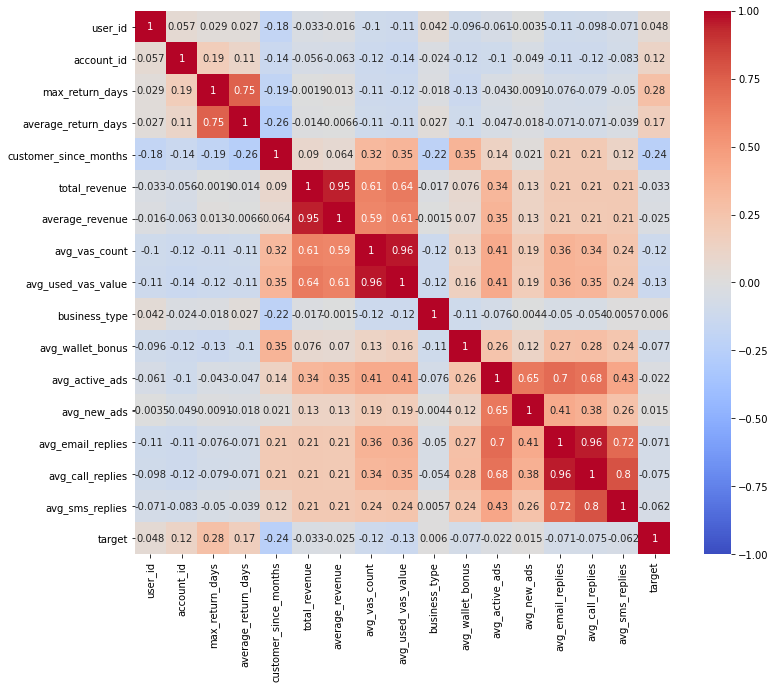

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(),vmin=-1,cmap='coolwarm',annot=True)

In [ ]:

# spliting the data to train and validation set
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,stratify=y)
# shape of the data of train and validation set
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (3300, 16)
Shape of the y_train (3300,)
Shape of the X_test (1100, 16)
Shape of the y_test (1100,)


In [ ]:
params = {}
params["objective"] = "binary"
params['metric'] = 'auc'
params["max_depth"] = -1
params["num_leaves"] = 10
params["min_data_in_leaf"] = 20
params["learning_rate"] = 0.03
params["bagging_fraction"] = 0.9
params["feature_fraction"] = 0.35
params["feature_fraction_seed"] = 20
params["bagging_freq"] = 10
params["bagging_seed"] = 30
params["'min_child_weight'"] = 0.09
params["lambda_l1"] = 0.01
params["verbosity"] = -1
from lightgbm import LGBMClassifier # intializing the model
model = LGBMClassifier(**params)
# fitting the model
model.fit(X_train, y_train)

LGBMClassifier("'min_child_weight'"=0.09, bagging_fraction=0.9, bagging_freq=10,
               bagging_seed=30, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.35,
               feature_fraction_seed=20, importance_type='split',
               lambda_l1=0.01, learning_rate=0.03, max_depth=-1, metric='auc',
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=10, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

Train AUC: 0.9207174085850557, Val Auc: 0.8580922387103662
AUC score of the model is 0.8580922387103662


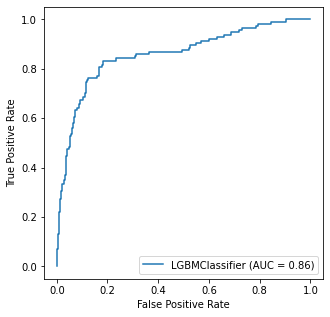

In [ ]:
def model_auc(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'Train AUC: {train_auc}, Val Auc: {val_auc}')
# model performance
model_auc(model)
# predicting the likelihood for the validation set
y_pred = model.predict_proba(X_test)[:, 1]
# checking the roc_auc_curve
print('AUC score of the model is {}'.format(roc_auc_score(y_test, y_pred)))
# the visualization of roc_auc score
plot_roc_curve(model, X_test, y_test)

In [ ]:
pip install lime

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=a2e5a4242e18e071be5d0bab058d9cfa19d5fd9078568cf23677302ea6c2ccdf
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
#Using Lime to make decision
from lime.lime_tabular import LimeTabularExplainer
class_names = [0, 1]
#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(X_test.values, class_names=class_names, feature_names = X_test.columns, discretize_continuous = True)
idx=0 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_test.values[idx], model.predict_proba, num_features=3, labels=class_names)
explainable_exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
#SHAPLY VALUES
#It has optimized functions for interpreting tree-based models and a model agnostic explainer function for interpreting any black-box model for which the predictions are known.

explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer Expected Value: {expected_value}")
idx = 100 # row selected for fast runtime
select = range(idx)
features = X_test.iloc[select]
feature_display = X.loc[features.index]
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer Expected Value: [-2.6431589]


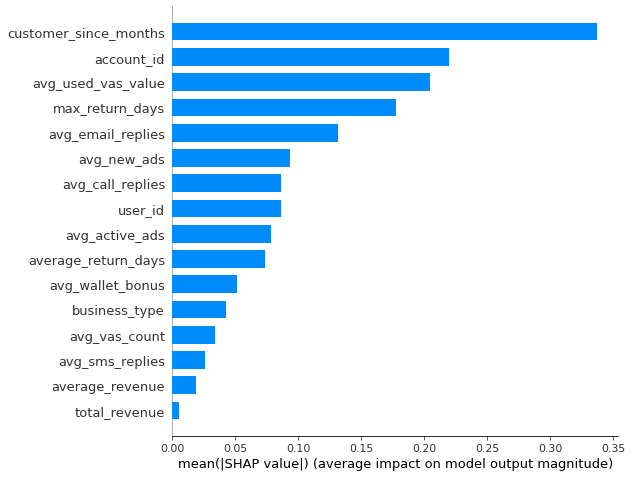

In [ ]:
shap.summary_plot(shap_values,feature_display,plot_type='bar')

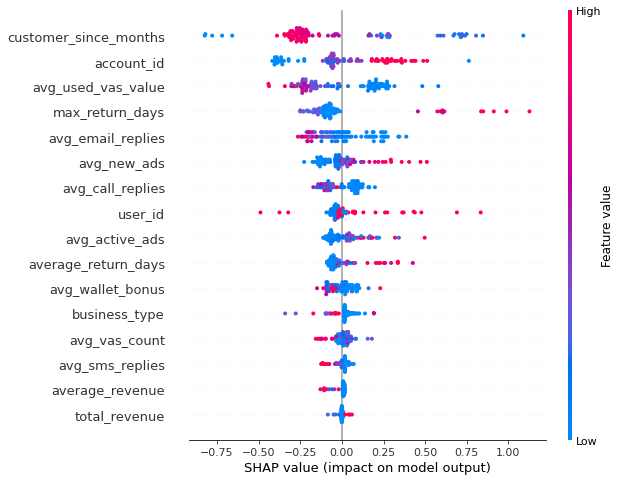

In [ ]:
shap.summary_plot(shap_values,features)

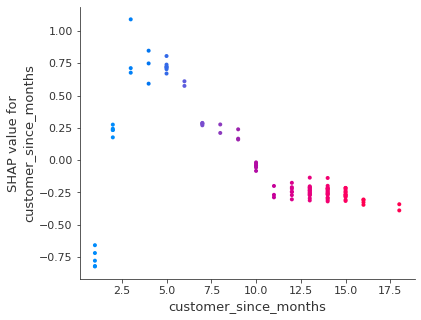

In [ ]:
shap.dependence_plot(ind='customer_since_months', interaction_index='customer_since_months',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)

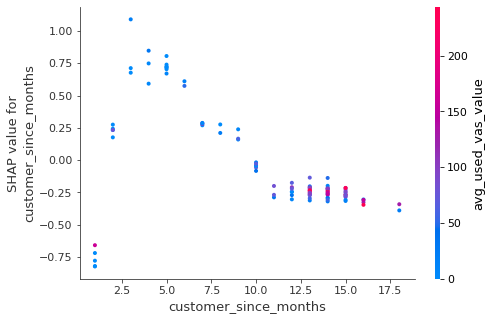

In [ ]:
#Two Dependency Plot

shap.dependence_plot(ind='customer_since_months', interaction_index='avg_used_vas_value',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)

In [ ]:
#Force Plot Individually
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value, shap_values=shap_values[0,:], features=feature_display.iloc[0,:])

In [ ]:
#Multiple Force Plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, feature_display)


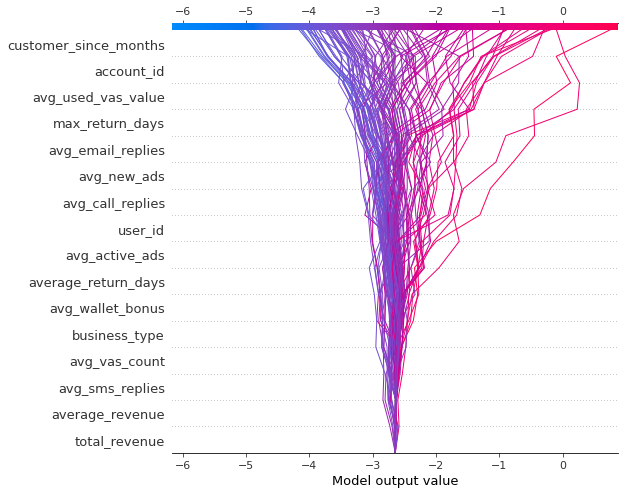

In [ ]:
#Decision Plot
shap.decision_plot(expected_value, shap_values, features)

In [ ]:
df.describe(include='all')

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


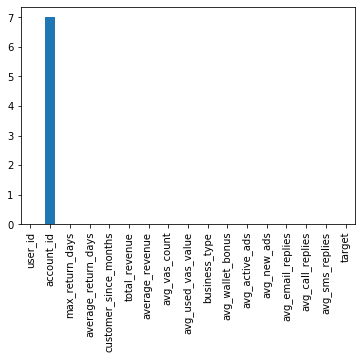

In [ ]:
df.isnull().sum().plot(kind='bar')

In [ ]:
pd.DataFrame(list(zip(df.columns,df.isnull().sum(),df.isnull().sum()/4407*100)),columns=['Features','n/a','%'])

,Features,n/a,%
0,user_id,0,0.000000
1,account_id,7,0.158838
2,max_return_days,0,0.000000
3,average_return_days,0,0.000000
4,customer_since_months,0,0.000000
5,total_revenue,0,0.000000
6,average_revenue,0,0.000000
7,avg_vas_count,0,0.000000
8,avg_used_vas_value,0,0.000000
9,business_type,0,0.000000


Since this data has missing values in account id so I am going to remove that column, as we already have user_id.

In [ ]:
df1 = df.drop(['account_id'],axis=1)
df1.head()

,user_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


business_type    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

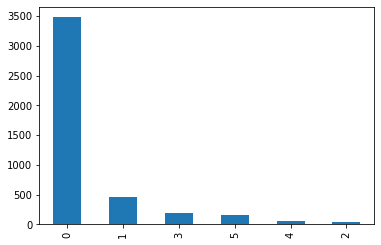

In [ ]:
df[['business_type']].apply(lambda x: x.value_counts().plot(kind='bar'))

In [ ]:
df.business_type.value_counts()

0    3482
1     458
3     199
5     165
4      54
2      49
Name: business_type, dtype: int64

customer_since_months    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

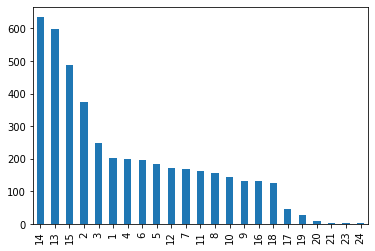

In [ ]:
df[['customer_since_months']].apply(lambda x: x.value_counts().plot(kind='bar'))

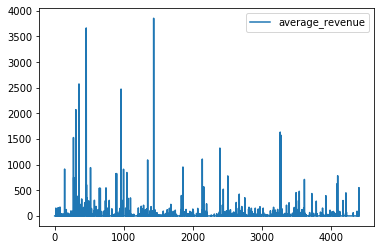

In [ ]:
df[['average_revenue']].plot()

In [ ]:
df.account_id.value_counts()

1005.0    684
493.0     483
499.0     467
496.0     467
262.0     438
1017.0    436
113.0     290
226.0     275
111.0     248
112.0     148
364.0     134
517.0     112
202.0     111
115.0      73
116.0      34
Name: account_id, dtype: int64

In [ ]:
acc = df[['account_id','user_id','target']].groupby(['user_id'],as_index=False).account_id.count()
acc

,user_id,account_id
0,410039,1
1,410240,1
2,411764,1
3,411985,1
4,412071,1
...,...,...
4402,73498690100,1
4403,73519239100,1
4404,73525763100,1
4405,73538605100,1


In [ ]:
business = df[['business_type','total_revenue','average_revenue']].groupby(['business_type'],as_index=False).sum()
business

,business_type,total_revenue,average_revenue
0,0,765635.9840,63123.059495
1,1,27882.6918,3355.934902
2,2,0.0000,0.000000
3,3,26597.5504,3876.393192
4,4,2027.4143,495.219340
5,5,33388.8762,3815.498887


In [ ]:
business.pivot(index='average_revenue',columns='total_revenue')

business_type                                                  \
total_revenue     0.0000      2027.4143   26597.5504  27882.6918  33388.8762    
average_revenue                                                                 
0.000000                  2.0         NaN         NaN         NaN         NaN   
495.219340                NaN         4.0         NaN         NaN         NaN   
3355.934902               NaN         NaN         NaN         1.0         NaN   
3815.498887               NaN         NaN         NaN         NaN         5.0   
3876.393192               NaN         NaN         3.0         NaN         NaN   
63123.059495              NaN         NaN         NaN         NaN         NaN   

                             
total_revenue   765635.9840  
average_revenue              
0.000000                NaN  
495.219340              NaN  
3355.934902             NaN  
3815.498887             NaN  
3876.393192             NaN  
63123.059495            0.0

In [ ]:
df.max_return_days.value_counts().to_frame()

,max_return_days
1,2093
31,251
2,203
3,167
4,110
...,...
110,1
154,1
158,1
174,1


In [ ]:
return_day = df[['user_id','max_return_days']]

In [ ]:
return_day.head()

,user_id,max_return_days
0,410039,8
1,410240,37
2,411764,9
3,411985,1
4,412071,1


In [ ]:
np.unique(return_day['max_return_days'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161,
       162, 163, 165, 167, 168, 171, 172, 173, 174, 176, 177, 182, 183,
       184, 185, 188, 189, 192, 193, 195, 196, 197, 200, 204, 20

In [ ]:
type(return_day['max_return_days'])

pandas.core.series.Series

In [ ]:
return_day.describe()

,user_id,max_return_days
count,4.407000e+03,4407.000000
mean,4.106655e+09,22.335602
std,6.794948e+09,43.591246
min,4.100390e+05,1.000000
25%,6.184510e+08,1.000000
50%,7.296626e+08,2.000000
75%,7.292936e+09,30.000000
max,7.356031e+10,354.000000


In [ ]:
Frequency = []
for day in return_day['max_return_days']:
    if day>30:
        day=3
    elif (day<=30)and(day>2):
        day=2
    Frequency.append(day)  
print(Frequency)

[2, 3, 2, 1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 2, 2, 1, 1, 2, 3, 3, 2, 2, 2, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 3, 2, 3, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 3, 3, 3, 3, 3, 2, 1, 3, 2, 2, 2, 3, 1, 3, 1, 1, 3, 2, 2, 3, 3, 1, 3, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 3, 3, 1, 2, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 3, 3, 3, 2, 1, 1, 2, 2, 3, 3, 3, 1, 2, 2, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2, 3, 

In [ ]:

for n,i in enumerate(Frequency):
    if i==1:
        Frequency[n]="Very Frequent"
    elif i==2:
        Frequency[n]='Moderately Frequent'
    else:
        Frequency[n]='Not Frequent'
Frequency

['Moderately Frequent',
 'Not Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Moderately Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Not Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Frequent',
 'Moderately Frequent',
 'Not Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Not Frequent',
 'Not Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Fre

In [ ]:
return_day['re-purchase']=pd.Series(Frequency)

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
return_day.head()

,user_id,max_return_days,Frequency,re-purchase
0,410039,8,Moderately Frequent,Moderately Frequent
1,410240,37,Not Frequent,Not Frequent
2,411764,9,Moderately Frequent,Moderately Frequent
3,411985,1,Very Frequent,Very Frequent
4,412071,1,Very Frequent,Very Frequent


In [ ]:
df_new=pd.concat([df,return_day['re-purchase']],axis=1)
df_new.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,re-purchase
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0,Moderately Frequent
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0,Not Frequent
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0,Moderately Frequent
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1,Very Frequent
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0,Very Frequent


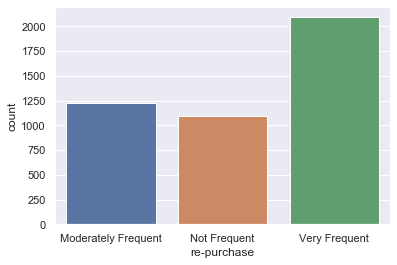

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.countplot(df_new['re-purchase'])

In [ ]:
df_new.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


Customer_since_months
- min = 1
- q1 = 5
- q2 = 12
- q3 = 14
- max = 24


In [ ]:
df3=df[['customer_since_months','avg_vas_count','avg_used_vas_value','avg_active_ads']]

In [ ]:
#df3['customer_since_months_new']
list1=[]
for i in df3['customer_since_months']:
    if i>14:
        i='Consistent Customer'
    elif (i<=14)and(i>12):
        i='Moderately Consistent'
    elif (i<=12)and(i>5):
        i='becoming Consistent'
    else:
        i='New Customer'
    list1.append(i)  
list1  

['Moderately Consistent',
 'becoming Consistent',
 'Consistent Customer',
 'Moderately Consistent',
 'Consistent Customer',
 'Moderately Consistent',
 'becoming Consistent',
 'Consistent Customer',
 'New Customer',
 'New Customer',
 'Moderately Consistent',
 'becoming Consistent',
 'Moderately Consistent',
 'Moderately Consistent',
 'becoming Consistent',
 'Consistent Customer',
 'Moderately Consistent',
 'Consistent Customer',
 'Consistent Customer',
 'Moderately Consistent',
 'Consistent Customer',
 'Moderately Consistent',
 'Moderately Consistent',
 'Moderately Consistent',
 'New Customer',
 'Moderately Consistent',
 'Consistent Customer',
 'Moderately Consistent',
 'Moderately Consistent',
 'Moderately Consistent',
 'Consistent Customer',
 'Moderately Consistent',
 'Moderately Consistent',
 'becoming Consistent',
 'Moderately Consistent',
 'Consistent Customer',
 'Consistent Customer',
 'becoming Consistent',
 'becoming Consistent',
 'Moderately Consistent',
 'Consistent Customer',

In [ ]:
df3['customer_since_months_new']=pd.Series(list1)
df3.head()

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_since_months,avg_vas_count,avg_used_vas_value,avg_active_ads,customer_since_months_new
0,14,3.666667,66.666667,79.333333,Moderately Consistent
1,10,4.900000,114.000000,232.100000,becoming Consistent
2,15,5.333333,106.666667,55.083333,Consistent Customer
3,14,6.307692,176.153846,409.538462,Moderately Consistent
4,18,5.846154,109.230769,48.230769,Consistent Customer


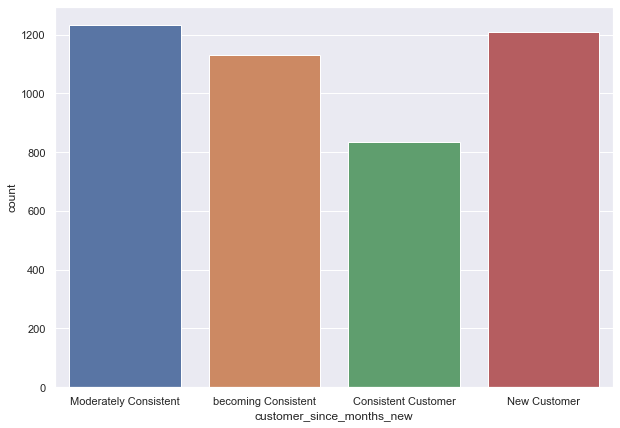

In [ ]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(df3['customer_since_months_new'])

In [ ]:
df3.head()

,customer_since_months,avg_vas_count,avg_used_vas_value,avg_active_ads,customer_since_months_new
0,14,3.666667,66.666667,79.333333,Moderately Consistent
1,10,4.900000,114.000000,232.100000,becoming Consistent
2,15,5.333333,106.666667,55.083333,Consistent Customer
3,14,6.307692,176.153846,409.538462,Moderately Consistent
4,18,5.846154,109.230769,48.230769,Consistent Customer


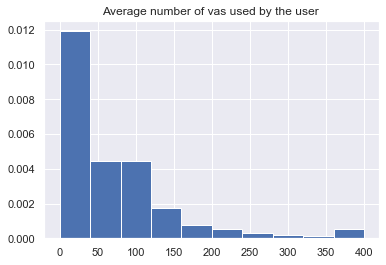

In [ ]:
#avg_used_vas_value: Average number of vas used by the user
#group_by_cust=df.groupby(['user_id'])
avg_amount=df3['avg_used_vas_value']

plt.hist(np.clip(avg_amount,0,400),density=True)
plt.title("Average number of vas used by the user ")
plt.show()

avg_used_vas_value: Average number of vas used by the user
- min =0
- q1= 2.727273
- q2= 45
- q3= 100
- max= 3357.50

In [ ]:
print(np.where((df3.avg_used_vas_value == 0)&(df3.))

(array([   8,    9,   42, ..., 4403, 4404, 4406], dtype=int64),)
